In [15]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
superpopulation_code_colors = ['#D9EDF8', '#FFADAD', '#E4F1EE', '#FFD6A5', '#DEDAF4', '#FDFFB6']

superpopulation_code_dict = {
    'EUR': 0,
    'EAS': 1,
    'AMR': 2,
    'SAS': 3,
    'AFR': 4,
    'EUR,AFR': 5,
}

In [17]:
from my_knn_module.import_data import import_genome_data_as_df

In [18]:
real_df = import_genome_data_as_df(superpopulation_code_dict=superpopulation_code_dict)

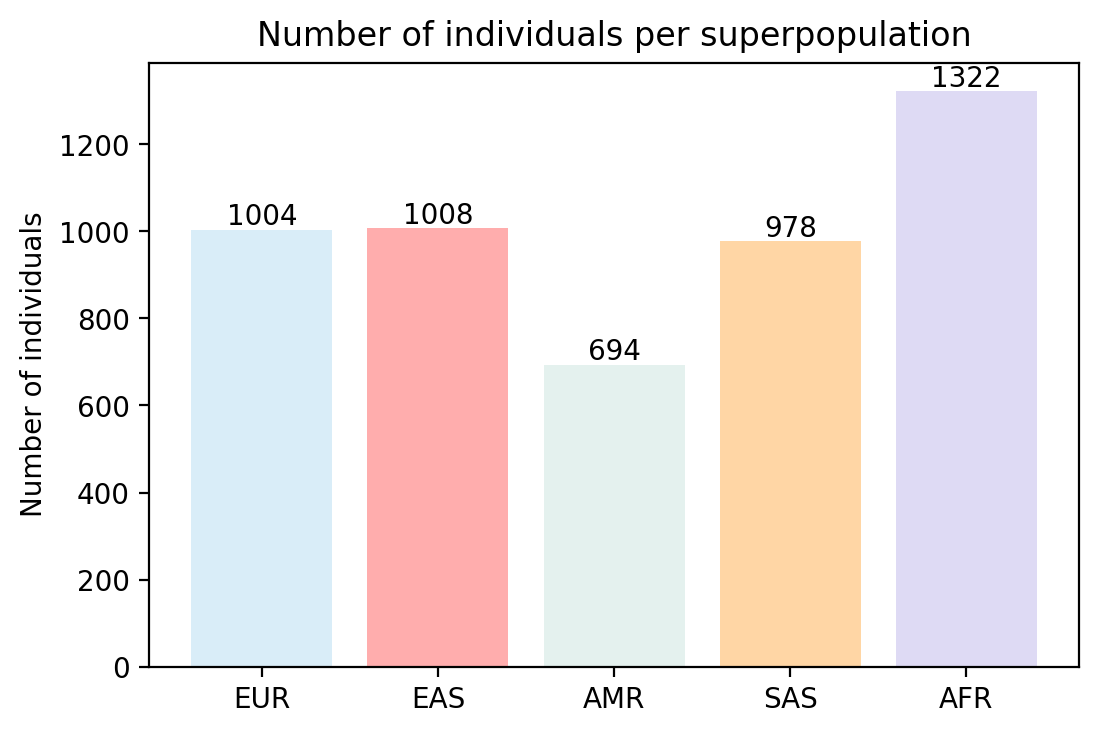

In [19]:
fig, ax = plt.subplots()
fig.set_dpi(200)
individual_per_pop = []
pop_names = ["EUR", "EAS", "AMR", "SAS", "AFR"]
for i in range(5):
    individual_per_pop.append(real_df[real_df['Superpopulation code'] == i].shape[0])

bars = ax.bar(pop_names, height=individual_per_pop, color=superpopulation_code_colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, horizontalalignment='center')
ax.set_ylabel('Number of individuals')
ax.set_title('Number of individuals per superpopulation')

plt.show()

In [22]:
real_df = real_df[real_df["Superpopulation code"] != 5]

def superpopulation_all_same():
    individual_per_pop = []
    for i in range(5):
        individual_per_pop.append(real_df[real_df['Superpopulation code'] == i].shape[0])
    return all(i == individual_per_pop[0] for i in individual_per_pop)

def min_superpop():
    individual_per_pop = []
    for i in range(5):
        individual_per_pop.append(real_df[real_df['Superpopulation code'] == i].shape[0])
    return [idx for idx, value in enumerate(individual_per_pop) if value == min(individual_per_pop)]

i = 0
while not(superpopulation_all_same()):
    row_to_remove = real_df.sample(1)
    if all(i != row_to_remove.iloc[0]["Superpopulation code"] for i in min_superpop()):
        real_df = real_df[real_df["Sample"] != row_to_remove.iloc[0]["Sample"]]
        i += 1
        if i % 100 == 0: print("Removed ", i, " values.")
print("--> Removed ", i, " values in total.")

KeyError: 'Sample'

In [ ]:
real_df.to_csv("./generated/REAL_same_amount.csv", sep=" ", na_rep='', index=False)
real_df.head()

In [ ]:
real_df = pd.read_csv('./generated/' + 'REAL_same_amount.csv', delimiter = ' ')
real_df.head()

In [ ]:
fig, ax = plt.subplots()

individual_per_pop = []
pop_names = ["EUR", "EAS", "AMR", "SAS", "AFR"]
for i in range(5):
    individual_per_pop.append(real_df[real_df['Superpopulation code'] == i].shape[0])

bars = ax.bar(pop_names, height=individual_per_pop, color=superpopulation_code_colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, horizontalalignment='center')
ax.set_ylabel('Number of individuals')
ax.set_title('Number of individuals per superpopulation')

plt.show()

In [24]:
NUMBER_OF_NEIGHBORS = 6
MODEL = KNeighborsClassifier

In [25]:
X = real_df.iloc[:, 3:10002]
y = np.ravel(real_df.iloc[:, 10002:10003])
knn_model = MODEL(n_neighbors = NUMBER_OF_NEIGHBORS)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

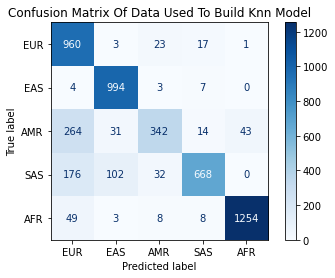

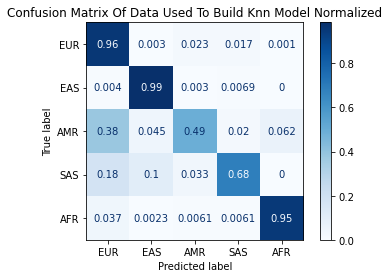

0.8425888933280063


In [26]:
disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    X,
    y,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR"],
    normalize=None
)

disp.ax_.set_title("Confusion Matrix Of Data Used To Build Knn Model")

plt.show()

disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    X,
    y,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR"],
    normalize='true'
)

disp.ax_.set_title("Confusion Matrix Of Data Used To Build Knn Model Normalized")

plt.show()

print(knn_model.score(X, y))

In [27]:
test_sample = import_genome_data_as_df().reset_index(drop=True)
test_sample = test_sample[test_sample["Superpopulation code"] != 5]
test_sample_input = test_sample.iloc[:, 3:10002]
test_sample_real = np.ravel(test_sample.iloc[:, 10002:10003])
test_predictions = knn_model.predict(test_sample_input)

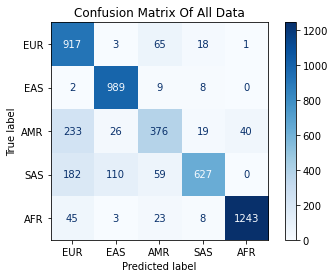

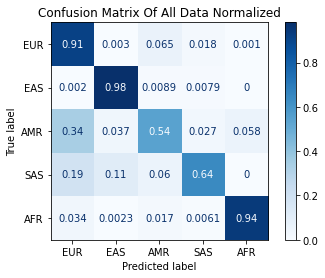

0.8294047143427886


In [14]:
disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    test_sample_input,
    test_sample_real,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR"],
    normalize=None
)

disp.ax_.set_title("Confusion Matrix Of All Data")

plt.show()

disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    test_sample_input,
    test_sample_real,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR"],
    normalize='true'
)

disp.ax_.set_title("Confusion Matrix Of All Data Normalized")

plt.show()
print(knn_model.score(test_sample_input, test_sample_real))

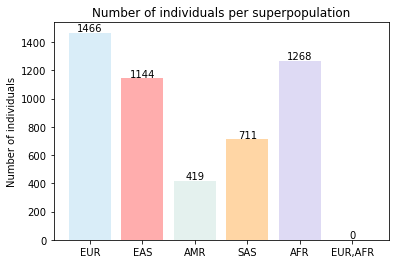

,Type,Sample,0,1,2,3,4,5,6,7,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Superpopulation code
0,AG,AG0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,AMR
1,AG,AG1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,EAS
2,AG,AG2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,EAS
3,AG,AG3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,EAS
4,AG,AG4,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,AFR


In [15]:
ag_df = import_genome_data_as_df(filename='WGAN.hapt', labels=None)

ag_preds = knn_model.predict(ag_df.iloc[:, 3:10002])

ag_df["Superpopulation code"] = ag_preds

superpopulation_code_dict = {
    0 : 'EUR',
    1 : 'EAS',
    2 : 'AMR',
    3 : 'SAS',
    4 : 'AFR',
    5 : 'EUR,AFR',
}

superpopulation_code_colors = ['#D9EDF8', '#FFADAD', '#E4F1EE', '#FFD6A5', '#DEDAF4', '#FDFFB6']

fig, ax = plt.subplots()

individual_per_pop = []
pop_names = ["EUR", "EAS", "AMR", "SAS", "AFR", "EUR,AFR"]
for i in range(6):
    individual_per_pop.append(ag_df[ag_df['Superpopulation code'] == i].shape[0])

bars = ax.bar(pop_names, height=individual_per_pop, color=superpopulation_code_colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, horizontalalignment='center')
ax.set_ylabel('Number of individuals')
ax.set_title('Number of individuals per superpopulation')

plt.show()

ag_df["Superpopulation code"].replace(superpopulation_code_dict, inplace=True)

ag_df.head()